## Telco Customer Churn Dataset - How to use data analytics to understand (and prevent) customer churn?

## 0. Overview - Churn

### What is churn?

> Churn is the percentage of customers who stop using your business during a given period of time. [(Airfocus)](https://airfocus.com/glossary/what-is-churn/)

If a customer stops to buy your products, to use your services, or to subscribe to a recurring payment plan, you can consider it churn. The ratio of active customers to customers lost is commonly called the "churn rate", and is an important metric for almost every business.

### Why does it happen?

Churn can have numerous causes that can be related to the product/service, the company providing it, competing companies, market trends, etc., such as:

- **Customers can no longer afford it:** During financial crises people are likely to focus on securing those products/services that are extremely necessary, and stop using those that may be considered superfluous.

- **Competitors are providing better solutions/prices:** As we know, some sectors of the goods and services market are very competitive, so competing companies are always striving to provide the most cost-effective solution for their customers.

- **The product does not meet customers' needs:** Customers' needs may change over time and if your product does not adapt to these changes, it may become obsolete.

### Why do companies want to avoid it?

In addition to representing a decrease in company revenue, the loss of a customer results, in a sense, in the need to get a new one "in its place." However, the attraction and loyalty of a new customer is subject to the cost of acquisition and retention.

Customer Acquisition Cost (CAC) is the cost of turning a person into a customer. Marketing expenses, new member offers, and rewards for referring new customers are examples of CAC. Cutomer Retention Cost (CRC) is the cost of keeping customers. There are several ways to calculate this metric, but one of the most widely used considers the ratio of total retention cost to the number of active customers. [Some](https://www.optimove.com/resources/learning-center/customer-acquisition-vs-retention-costs) might say that the CAC is almost 5 times higher than the CRC.

There is another important metric when talking about churn, the Customer Livetime Value (CLV). CLV is the expected revenue that a customer will bring to the company. So when we increase the expected customer lifetime, i.e. the number of months a customer has stayed with the company, by reducing the churn rate, we also increase the CLV. Thus, the CAC and CRC will be proportionally lower relative to the CLV, which allows for an increase in profitability for each customer. Thus, keeping an active customer can be cheaper than attracting and keeping a new customer.

### How to prevent/reduce it?

The first step is to keep it under control. There will always be churn, some customers will not adapt to your product and look for others, but above a certain rate it can indicate problems that can affect the company's profit. Through data we can find patterns of customers that are likely to churn and the reasons that are causing it, which can help us take steps to manage it.

## 1. Overview - Telco customer churn

Telco is a fictitious company providing Internet and home phone proposed by IBM. The dataset has 7043 customer datapoints for the period of one month, with characteristics about the customers, the products they use, and the target characteristic, "churn", which indicates whether churn has happened or not.

## 2. Exploratory Data Analysis

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/churn_data.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset has 7043 datapoints and 21 features.

### 2.1 Data Integrity

We will check for missing values on the dataset.

In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

As it is a "handly" created dataset, it has no missing values, which is not common.

### 2.2 Univariate Analysis

As always, we should keep in mind that correlation does not attest to cause-and-effect relationships, but for predictive purposes, looking at variables correlated with the target variable can help us. To understand the factors that lead to churn more precisely, it is necessary to better understand the context of the company and its relationship with customers, products, and the market. In this way, it would be possible to propose assertive solutions that could eventually bring improvements to the company's indicators. However, for illustrative purposes, some hypotheses will be raised and from them will be proposed solutions aimed at reducing the Telco's churn.

- **Churn**: This feature indicates whether the client has churned or not.

In [5]:
def target(df,x):
    g = sns.catplot(x=x, kind='count', data=df)
    for ax in g.axes.flat:
        ax.bar_label(ax.containers[0])
        
def count_1d(df,x,hue,rotate=False):
    sns.countplot(x=x,data=df,hue=hue)
    if rotate:
        plt.xticks(rotation = 45) 
    
def describe_1d(df,x,hue,discrete=False):
    print_df = pd.DataFrame()
    print_df.name = 'hue'
    if discrete:
        for label in df[x].unique():
            label_df = pd.DataFrame(df.loc[df[x] == label][hue].value_counts())
            label_df.columns = [x+' '+str(label)]
            label_df = label_df/len(df.loc[df[x] == label])
            print_df = print_df.append(label_df.transpose())
        total_df = pd.DataFrame(df[x].value_counts())
        total_df.columns = ['total']
        total_df = total_df/len(df)
        cols = sorted(print_df.columns)
        print_df = print_df[cols]
        display(total_df.transpose())
    else:
        for label in df[hue].unique():
            label_df = pd.DataFrame(df.loc[df[hue] == label].describe()[x])
            label_df.columns = [label]
            print_df = print_df.append(label_df.transpose())
    display(print_df)
    
def kde_1d(df,x,hue,discrete=False,log=False,binwidth=3):
    fig, axes = plt.subplots(1,2,figsize=(10,6))
    if not discrete:
        sns.kdeplot(ax=axes[0],x=x,data=df,hue=hue,thresh=0,cut=0)
        axes[0].grid()
    else:
        sns.histplot(ax=axes[0],binwidth=binwidth,x=x,data=df,hue=hue,alpha=0.5)
        axes[0].grid()
    if log:
        axes[0].set_xscale('log')
    sns.boxplot(ax=axes[1],x=hue,y=x,data=df)
    
def stacked_plot(df,x,hue):
    cross_tab = pd.crosstab(index=df[hue],columns=df[x],normalize="index")
    ax = cross_tab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10')
    for p in ax.patches:
        ax.annotate(str('{:.1f}%'.format(p.get_height()*100)), (p.get_x() * 1.005 + p.get_width()/3, p.get_y() + p.get_height()/2))

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


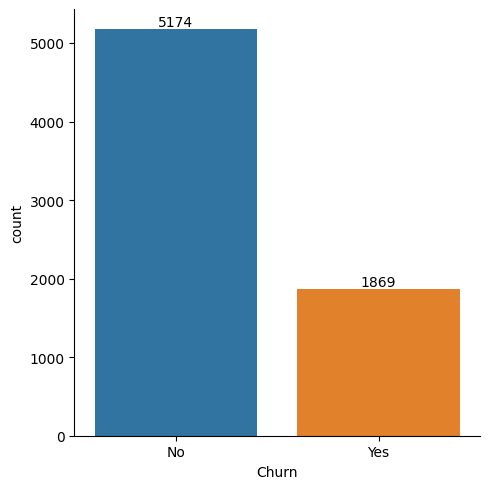

In [6]:
target(df,'Churn')
print(df['Churn'].value_counts(normalize=True))

There's a 26.5% churn rate on the dataset.

- **customerID**: it's an identification code for the costumer.

In [7]:
df['customerID'].describe()

count           7043
unique          7043
top       7590-VHVEG
freq               1
Name: customerID, dtype: object

The dataset has 7043 unique ID's, so each customer has an unique ID.

- **gender**: The gender of the customer.

,Male,Female
total,0.504756,0.495244


,No,Yes
gender Female,0.730791,0.269209
gender Male,0.738397,0.261603


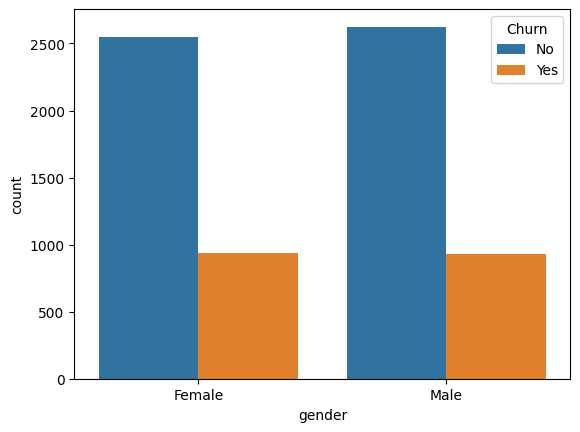

In [8]:
describe_1d(df,'gender','Churn',discrete=True)
count_1d(df,'gender','Churn')

The dataset is almost perfectly balanced between male and female genders, and the distribution of Churn among both genders seems very similar.

- **SeniorCitizen**: This feature indicates wheter a customer is a senior citizen or not.

,0,1
total,0.837853,0.162147


,No,Yes
SeniorCitizen 0,0.763938,0.236062
SeniorCitizen 1,0.583187,0.416813


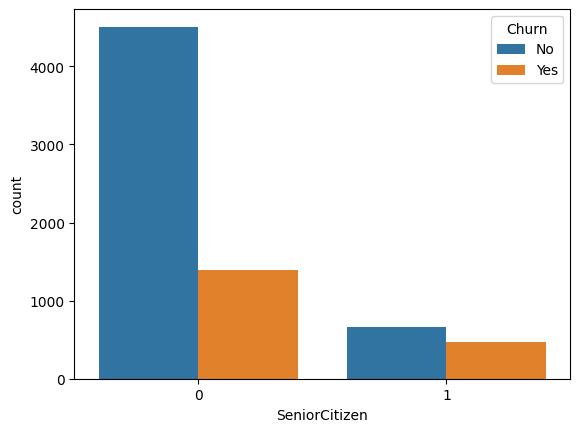

In [9]:
describe_1d(df,'SeniorCitizen','Churn',discrete=True)
count_1d(df,'SeniorCitizen','Churn')

Almost 84% of customers are not senior citizens. Among those who are, the churn rate is almost 42%, while there is less than 24% among those who are not. Customers in the dataset who are senior citizens tend to churn more than those who are not.

- **Partner**: This feature indicates whether a customer has a partner or not.

,No,Yes
total,0.516967,0.483033


,No,Yes
Partner Yes,0.803351,0.196649
Partner No,0.670420,0.329580


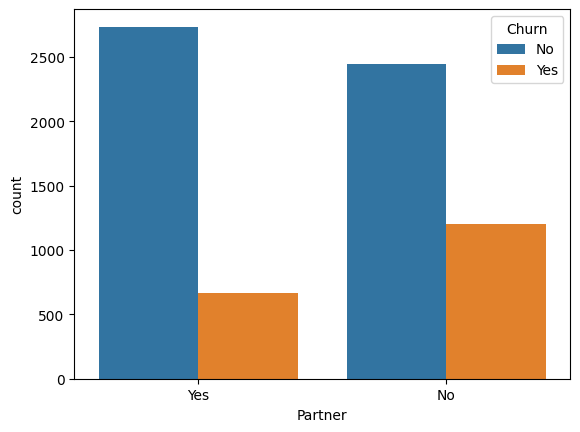

In [10]:
describe_1d(df,'Partner','Churn',discrete=True)
count_1d(df,'Partner','Churn')

Almost 51.7% of customers do not have a partner. The churn percentage among those who have partners is about 19.6%, while among those who do not is about 33%.

- **Dependents**: This feature indicates whether a customer has dependents or not.

,No,Yes
total,0.700412,0.299588


,No,Yes
Dependents No,0.687209,0.312791
Dependents Yes,0.845498,0.154502


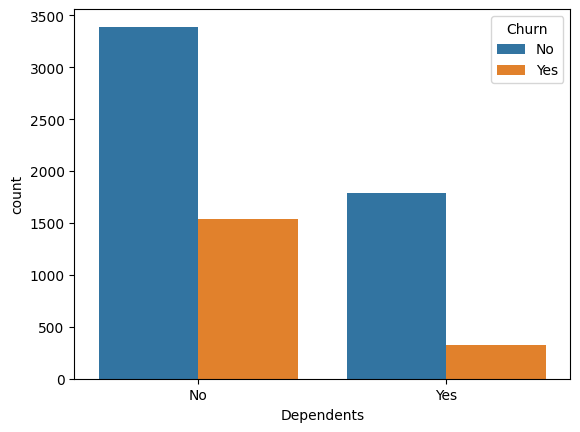

In [52]:
describe_1d(df,'Dependents','Churn',discrete=True)
count_1d(df,'Dependents','Churn')

Almost 70% of clients do not have dependents. Their churn rate is about 31.2%, being considerably higher than among customers who have dependents (15.4%).

- **tenure**: The number of months that the customer has stayed with the company.

,count,mean,std,min,25%,50%,75%,max
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


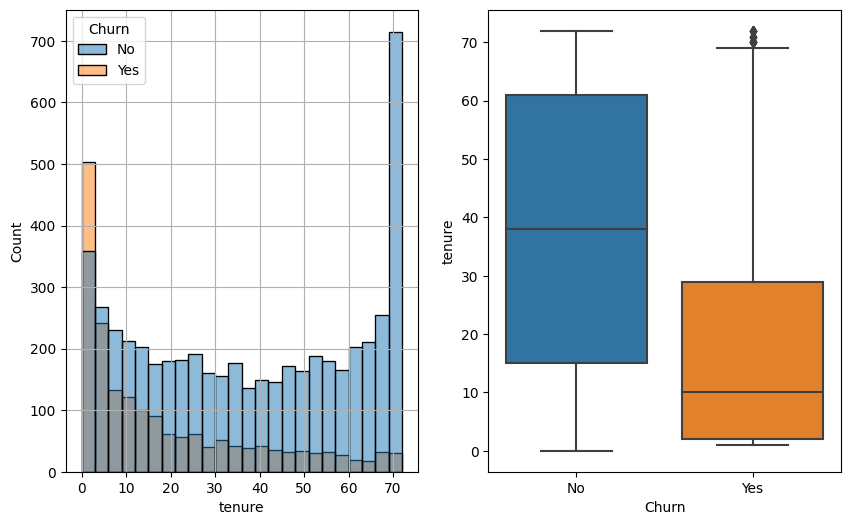

In [12]:
describe_1d(df,'tenure','Churn')
kde_1d(df,'tenure','Churn',discrete=True)

The distributions of tenure are quite different between clients who have churned and those who have not churned. It is important to note that the occurrence of churning affects the tenure of the client. If the customer has churned, he is no longer dealing with the company, so the counting of the tenure period stops. Among "churned customers", there is a spike in distribution density at 2-3 months, which decreases as tenure increases.

Among customers who have not churned, the distribution has 2 peaks: one near 5 months and one near 70 months. It is important to note that this is a good measure of the distribution of tenure among "current customers". Therefore, we can treat it as the pdf that a client has a tenure of x months. Their average tenure is 37.6 months.

If we divide the pdf of revolving customers by the pdf of the current customer, we will "normalize" it by the distribution of tenure among customers. Their average duration is 18 months. In this case, the distribution of ownership is fairly even, so it tends to maintain the shape of the churn distribution curve, but in other cases, with a more unbalanced distribution of ownership, the imbalance can disrupt the analysis, and it is essential to take this step. 

Text(0, 0.5, 'pdf')

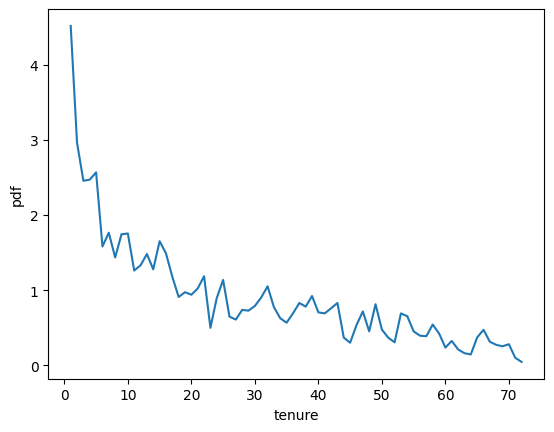

In [13]:
churn_count = pd.DataFrame(df.loc[df['Churn'] == 'Yes']['tenure'].value_counts(normalize=True))
churn_count.columns = ['churn']
not_churn_count = pd.DataFrame(df.loc[df['Churn'] == 'No']['tenure'].value_counts(normalize=True))
not_churn_count.columns = ['not_churn']
counter = churn_count.join(not_churn_count)
counter = churn_count.join(not_churn_count)
counter['prop'] = counter['churn']/counter['not_churn']
counter = counter.sort_index()
plt.plot(counter.index,counter.prop)
plt.xlabel('tenure')
plt.ylabel('pdf')

As expected, the distribution keept its shape.

- **PhoneService**: This feature indicates whether the customer has a phone service or not.

,Yes,No
total,0.903166,0.096834


,No,Yes
PhoneService No,0.750733,0.249267
PhoneService Yes,0.732904,0.267096


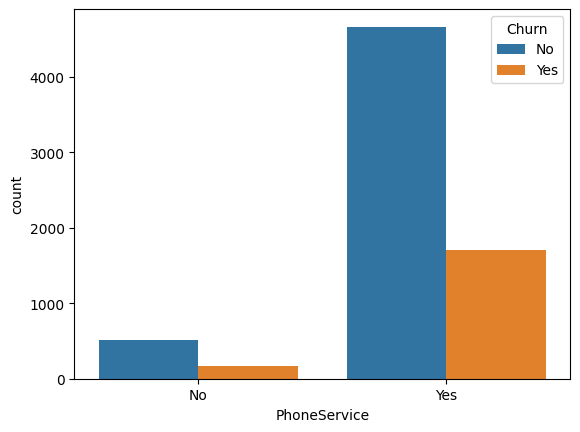

In [14]:
describe_1d(df,'PhoneService','Churn',discrete=True)
count_1d(df,'PhoneService','Churn')

Only 9.6% of customers do not have a phone service. The distribution of churn is very similar in both cases, being slightly higher for those who have the phone service.

- **MultipleLines**: If the customer has phone service, this features indicates whether it has multiple lines or not. If the customer has no phone service, it indicates "No phone service".

,No,Yes,No phone service
total,0.481329,0.421837,0.096834


,No,Yes
MultipleLines No phone service,0.750733,0.249267
MultipleLines No,0.749558,0.250442
MultipleLines Yes,0.713901,0.286099


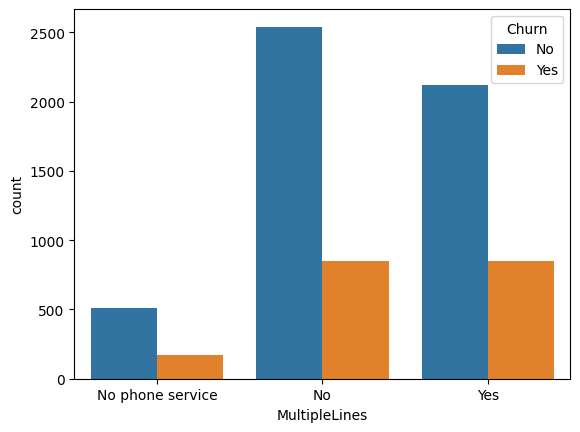

In [15]:
describe_1d(df,'MultipleLines','Churn',discrete=True)
count_1d(df,'MultipleLines','Churn')

This feature brings, in some ways, the same information as the previous feature, but it also brings information about multiple lines. Selecting only those customers who have telephone services can help us with the analysis.

In [16]:
describe_1d(df.loc[df['PhoneService'] == 'Yes'],'MultipleLines','Churn',discrete=True)

,No,Yes
total,0.532935,0.467065


,No,Yes
MultipleLines No,0.749558,0.250442
MultipleLines Yes,0.713901,0.286099


46.7% of customers who have telephone services also have multiple lines. Of those with multiple lines, the churn rate is about 28.6%, slightly higher than the percentage of those without (25%).

- **InternetService**: This feature indicates whether the customer has internet service or not. For those who have, it indicates if it is DSL ou Fiber optic.

Only customers that have internet service:


,Fiber optic,DSL
total,0.561175,0.438825


,No,Yes
InternetService DSL,0.810409,0.189591
InternetService Fiber optic,0.581072,0.418928


All costumers:


,Fiber optic,DSL,No
total,0.439585,0.343746,0.216669


,No,Yes
InternetService DSL,0.810409,0.189591
InternetService Fiber optic,0.581072,0.418928
InternetService No,0.925950,0.074050


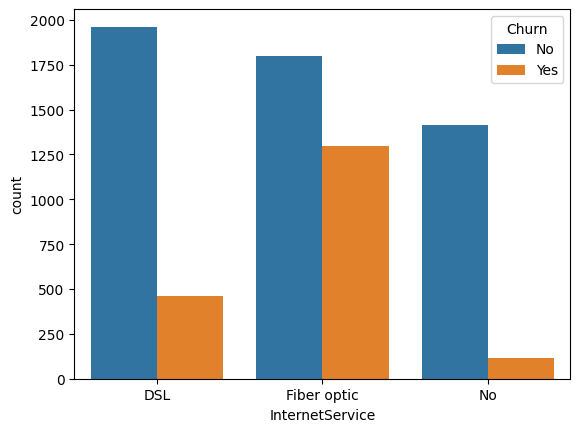

In [17]:
print('Only customers that have internet service:')
describe_1d(df.loc[df['InternetService'] != 'No'],'InternetService','Churn',discrete=True)
print('All costumers:')
describe_1d(df,'InternetService','Churn',discrete=True)
count_1d(df,'InternetService','Churn')

Only 21.7% of customers have no Internet service. Their churn rate is about 7.4%. Of those that do, 56.1% have Fiber Optic and the rest have DSL. The churn rate of those with Fiber Optic is about 41.9%, which is considerably higher than that of those with DSL (18.9%). 

- **OnlineSecurity**: If the customer has internet service it indicates whether a client has online security or not, if it hasn't, it indicates "No internet service".

Only customers that have internet service:


,No,Yes
total,0.63404,0.36596


,No,Yes
OnlineSecurity No,0.582333,0.417667
OnlineSecurity Yes,0.853888,0.146112


All costumers:


,No,Yes,No internet service
total,0.496663,0.286668,0.216669


,No,Yes
OnlineSecurity No,0.582333,0.417667
OnlineSecurity Yes,0.853888,0.146112
OnlineSecurity No internet service,0.925950,0.074050


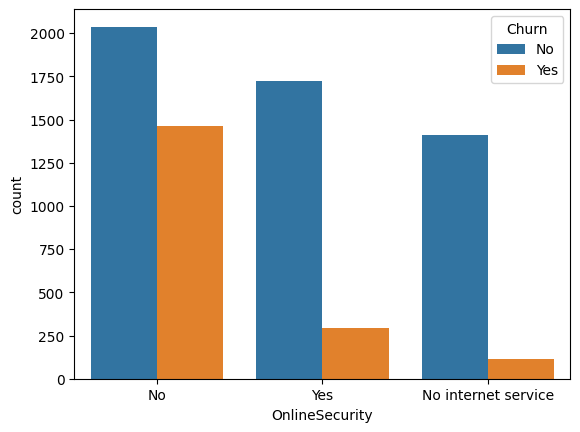

In [53]:
print('Only customers that have internet service:')
describe_1d(df.loc[df['InternetService'] != 'No'],'OnlineSecurity','Churn',discrete=True)
print('All costumers:')
describe_1d(df,'OnlineSecurity','Churn',discrete=True)
count_1d(df,'OnlineSecurity','Churn')

Of the customers who have Internet service, 36.6% have online security. Churn increases more among those who don't have it (41.8%) than among those who do (14.6%).

- **OnlineBackup**: This feature indicates whether the customer has online backup or not.

Only customers that have internet service:


,No,Yes
total,0.559724,0.440276


,No,Yes
OnlineBackup Yes,0.784685,0.215315
OnlineBackup No,0.600712,0.399288


All costumers:


,No,Yes,No internet service
total,0.43845,0.344881,0.216669


,No,Yes
OnlineBackup Yes,0.784685,0.215315
OnlineBackup No,0.600712,0.399288
OnlineBackup No internet service,0.925950,0.074050


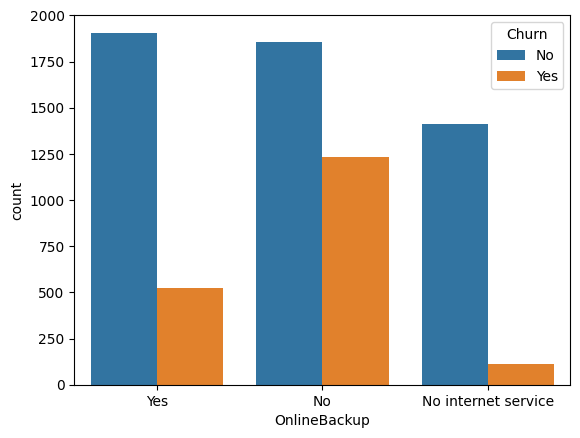

In [19]:
print('Only customers that have internet service:')
describe_1d(df.loc[df['InternetService'] != 'No'],'OnlineBackup','Churn',discrete=True)
print('All costumers:')
describe_1d(df,'OnlineBackup','Churn',discrete=True)
count_1d(df,'OnlineBackup','Churn')

Of the customers who have Internet service, almost 56% do not have online backup. Customers who do have it have a 21.5% churn rate, which is considerably lower than those who do not (40%).

- **DeviceProtection**: This feature indicates whether the customer has device protection or not.

Only customers that have internet service:


,No,Yes
total,0.560993,0.439007


,No,Yes
DeviceProtection No,0.608724,0.391276
DeviceProtection Yes,0.774979,0.225021


All costumers:


,No,Yes,No internet service
total,0.439443,0.343888,0.216669


,No,Yes
DeviceProtection No,0.608724,0.391276
DeviceProtection Yes,0.774979,0.225021
DeviceProtection No internet service,0.925950,0.074050


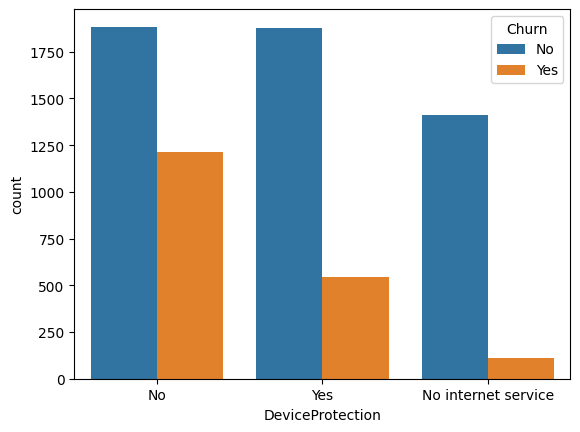

In [54]:
print('Only customers that have internet service:')
describe_1d(df.loc[df['InternetService'] != 'No'],'DeviceProtection','Churn',discrete=True)
print('All costumers:')
describe_1d(df,'DeviceProtection','Churn',discrete=True)
count_1d(df,'DeviceProtection','Churn')

The distributions are very similar to the online backup distributions. 56% of customers have no device protection, having a churn rate of 39.1%, while those who do have it have a churn rate of 22.5%, which is considerably lower.

- **TechSupport**: This feature indicates whether a customer has technical support or not.

Only customers that have internet service:


,No,Yes
total,0.629509,0.370491


,No,Yes
TechSupport No,0.583645,0.416355
TechSupport Yes,0.848337,0.151663


All costumers:


,No,Yes,No internet service
total,0.493114,0.290217,0.216669


,No,Yes
TechSupport No,0.583645,0.416355
TechSupport Yes,0.848337,0.151663
TechSupport No internet service,0.925950,0.074050


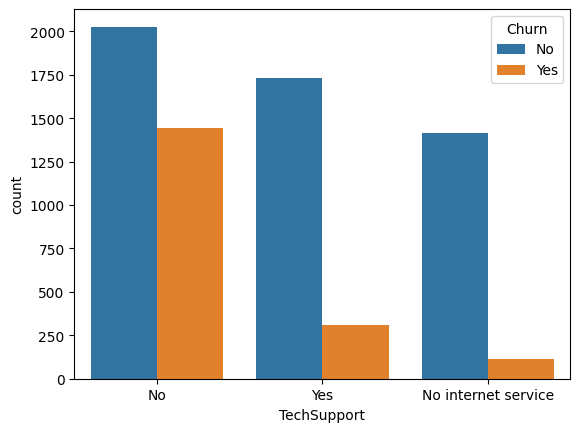

In [21]:
print('Only customers that have internet service:')
describe_1d(df.loc[df['InternetService'] != 'No'],'TechSupport','Churn',discrete=True)
print('All costumers:')
describe_1d(df,'TechSupport','Churn',discrete=True)
count_1d(df,'TechSupport','Churn')

Among customers who have Internet service, 37% have technical support. Of those with technical support, the churn rate is 15.2%, lower than the churn rate of those without it (41.6%). This may indicate that technical support could help "prevent" churn in some way, but we would need more evidence to prove this hypothesis.

- **StreamingTV**: This feature indicates whether a customer has streaming TV or not.

Only customers that have internet service:


,No,Yes
total,0.509335,0.490665


,No,Yes
StreamingTV No,0.664769,0.335231
StreamingTV Yes,0.699298,0.300702


All costumers:


,No,Yes,No internet service
total,0.398978,0.384353,0.216669


,No,Yes
StreamingTV No,0.664769,0.335231
StreamingTV Yes,0.699298,0.300702
StreamingTV No internet service,0.925950,0.074050


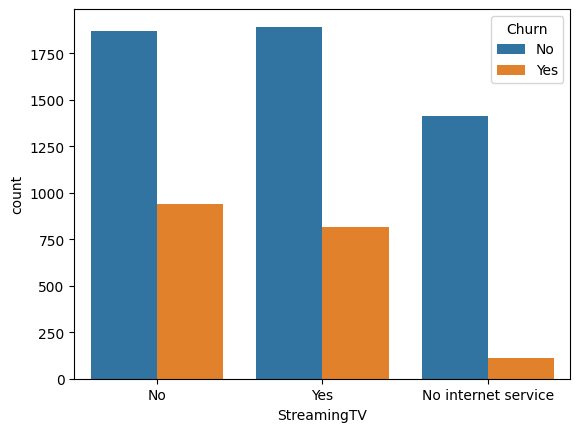

In [55]:
print('Only customers that have internet service:')
describe_1d(df.loc[df['InternetService'] != 'No'],'StreamingTV','Churn',discrete=True)
print('All costumers:')
describe_1d(df,'StreamingTV','Churn',discrete=True)
count_1d(df,'StreamingTV','Churn')

Among customers who have Internet service, the data set is almost equally distributed between those who have and do not have streaming TV. Of those who have it, the churn rate is 30%, which is very similar to the churn rate of those who don't (33.5%).

- **StreamingMovies**: This feature indicates whether a customer has streaming movies subscription or not.

Only customers that have internet service:


,No,Yes
total,0.504803,0.495197


,No,Yes
StreamingMovies No,0.663196,0.336804
StreamingMovies Yes,0.700586,0.299414


All costumers:


,No,Yes,No internet service
total,0.395428,0.387903,0.216669


,No,Yes
StreamingMovies No,0.663196,0.336804
StreamingMovies Yes,0.700586,0.299414
StreamingMovies No internet service,0.925950,0.074050


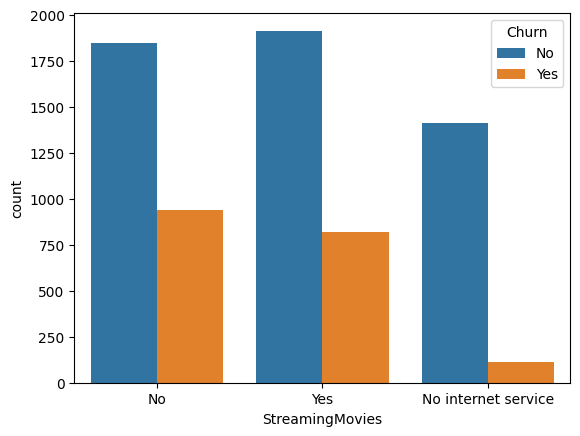

In [23]:
print('Only customers that have internet service:')
describe_1d(df.loc[df['InternetService'] != 'No'],'StreamingMovies','Churn',discrete=True)
print('All costumers:')
describe_1d(df,'StreamingMovies','Churn',discrete=True)
count_1d(df,'StreamingMovies','Churn')

Again, customers who have Internet service are almost equally distributed between having and hot having the streaming movie service. Among those who have it, the churn rate is 29.9%, and among those who don't it is about 33.7%, which is very similar to what was seen for the streaming TV service.

- **Contract**: This feature brings information about the type of contract of the customer:

,Month-to-month,Two year,One year
total,0.550192,0.240664,0.209144


,No,Yes
Contract Month-to-month,0.572903,0.427097
Contract One year,0.887305,0.112695
Contract Two year,0.971681,0.028319


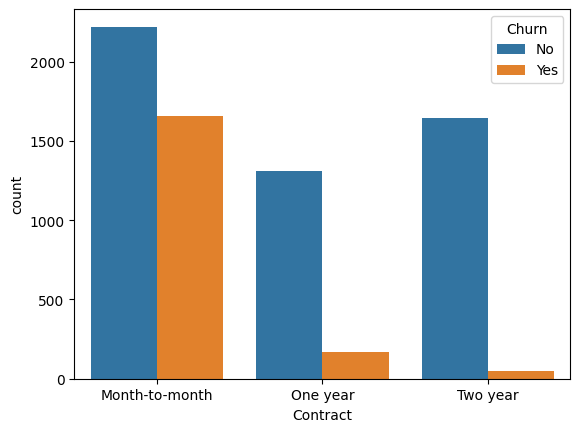

In [24]:
describe_1d(df,'Contract','Churn',discrete=True)
count_1d(df,'Contract','Churn')

The majority (55%) of customers have month-to-month contracts. This probably means that they can cancel the contract without paying penalties after a month. Among these, the churn rate is 42.7%. 

24.1% of customers have an annual contract, which can only be canceled without penalty at the end of a year. Among them, the churn rate is 11.3%, considerably lower than the churn rate observed among those with monthly contracts.

The remaining 20.9% of customers use 2-year contracts, with achurn rate of only 2.8%.

It appears that contract length has a high correlation with churn rate. Shorter contracts make churn easier, while customers with longer contracts tend to stay with the company longer. Later we will see if there is any correlation between contract length and customer contract type.

- **PaperlessBilling**: This feature indicates whether the client has paperless billing or not.

,Yes,No
total,0.592219,0.407781


,No,Yes
PaperlessBilling Yes,0.664349,0.335651
PaperlessBilling No,0.836699,0.163301


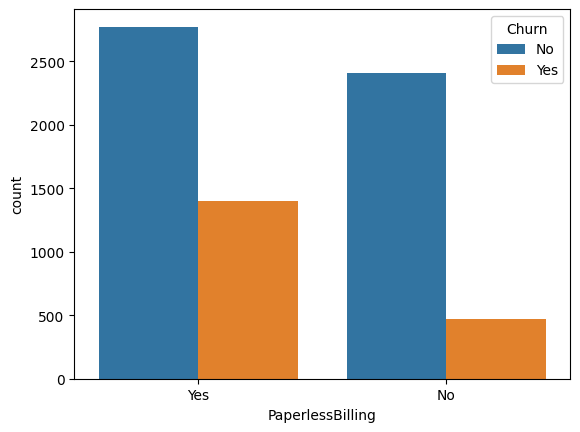

In [25]:
describe_1d(df,'PaperlessBilling','Churn',discrete=True)
count_1d(df,'PaperlessBilling','Churn')

Almost 60% of customers do not receive their paper invoices, with a churn rate of 33.6%. Among other customers, the churn rate is significantly lower at 16.3%.

- **PaymentMethod**: This feature indicates the payment method that the customer uses.

,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
total,0.335794,0.22888,0.219225,0.216101


,No,Yes
PaymentMethod Electronic check,0.547146,0.452854
PaymentMethod Mailed check,0.808933,0.191067
PaymentMethod Bank transfer (automatic),0.832902,0.167098
PaymentMethod Credit card (automatic),0.847569,0.152431


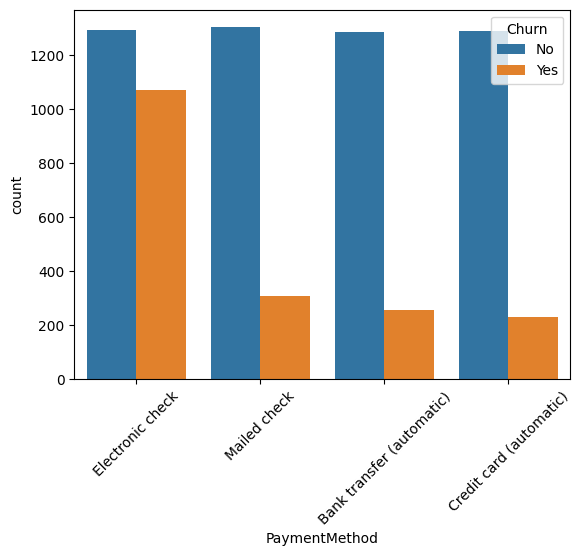

In [26]:
describe_1d(df,'PaymentMethod','Churn',discrete=True)
count_1d(df,'PaymentMethod','Churn',rotate=True)

33.6% of customers use electronic check payment methods. Among them, the churn rate is about 45.3%.

22.9% of customers pay for services by mailed check, with a churn rate of 19.1%.

21.9% of them pay by automatic bank transfer, with a churn rate of 16.7%.

The other 21.6% pay with automatic transaction by credit card, with a lower churn rate (15.2%).

Automatic payment methods reflect a lower churn rate than check payment methods, which is reasonable. Checks give, in a sense, an option with each payment that the customer will have to make if they don't pay it.

eCheck has the highest average churn, and is the most common payment method. More evidence would be needed to understand why this is the case. Does this payment method have problems? Does the lack of receiving mails create a certain distance between the customer and the company that may facilitate churn? Perhaps the use of eCheck by itself has no problems, but it may indicate something about the relationship between the customer and the company.

- **MonthlyCharges**: This feature indicates how much the customer pays monthly.

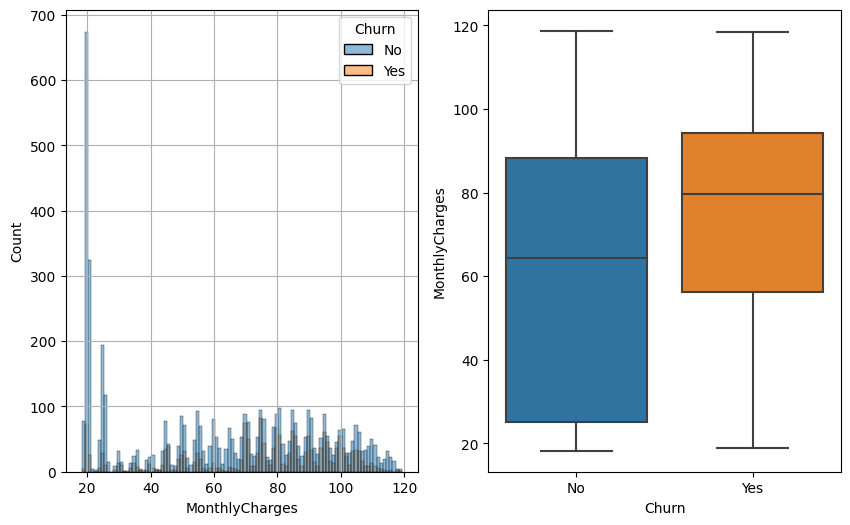

In [27]:
kde_1d(df,'MonthlyCharges','Churn',discrete=True,binwidth=1)

We can see that the charges are somewhat clustered next to the average monthly charges. We can create a larger box-width histogram to group these charges together.

,count,mean,std,min,25%,50%,75%,max
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


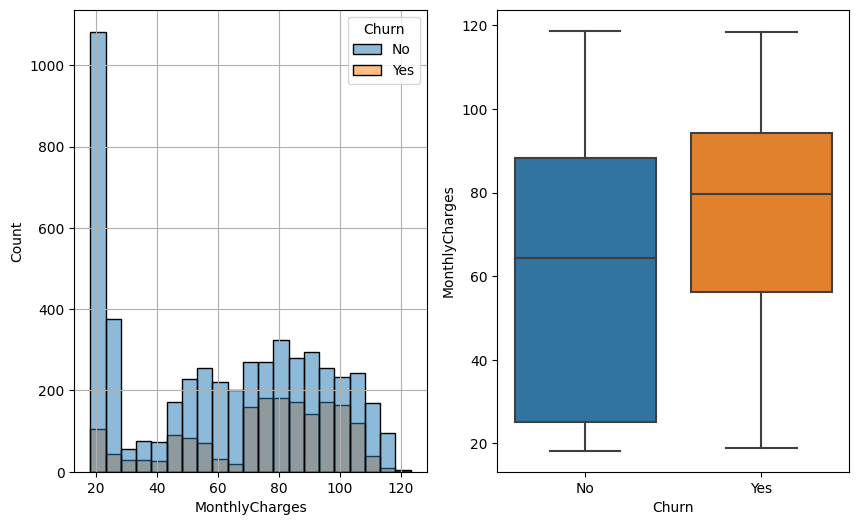

In [28]:
describe_1d(df,'MonthlyCharges','Churn')
kde_1d(df,'MonthlyCharges','Churn',discrete=True,binwidth=5)

Customers who have low monthly charges tend to "not churn". The distribution of monthly charges for customers who have no churn is "wider" than for those with churn. Churning customers have an average monthly bill of 74.4 dollars, while non-churning customers have an average monthly bill of 61.3 dollars.

- **TotalCharges**: This feature indicates the total charge of a customer, that is, how much he has already paid to the company.

An empty value was found in the TotalCharges column which was replaced by np.nan and the column was converted to float.

In [29]:
def floatfy(x):
    try:
        float(x)
        return float(x)
    except:
        return np.nan
        

df['TotalCharges'] = df['TotalCharges'].apply(floatfy)

,count,mean,std,min,25%,50%,75%,max
No,5163.0,2555.344141,2329.456984,18.80,577.825,1683.60,4264.125,8672.45
Yes,1869.0,1531.796094,1890.822994,18.85,134.500,703.55,2331.300,8684.80


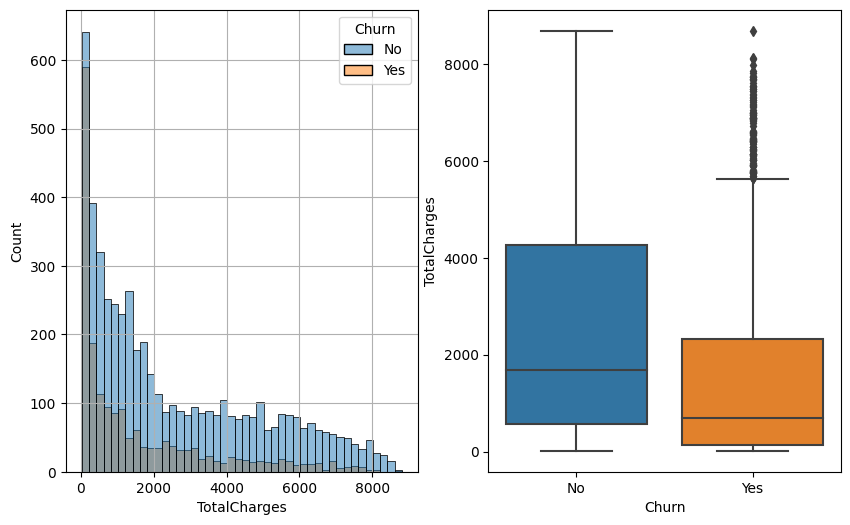

In [30]:
describe_1d(df,'TotalCharges','Churn')
kde_1d(df,'TotalCharges','Churn',discrete=True,binwidth=200)

Despite some possible changes in charges, this characteristic tends to be highly correlated with tenure product and customer monthly churn. Although customers with higher monthly fees are more likely to churn, customers with longer-term contracts are less likely to churn, so non-churning customers have an average total charge of 2,555 dollars, almost 1,000 dollars higher than churners.

### 2.3 Multivariate Analysis

We will create new columns for features that indicate only "no" (0) or "yes" (1). When the client is labeled with "No Internet service" or "No phone service" it will be stored as np.nan for easier analysis. This will help us create a heat map of correlations.

In [31]:
map_dict = {'Yes': 1,
           'No': 0,
            'DSL': 1,
            'Fiber optic': 1,
           'No internet service': np.nan,
           'No phone service': np.nan}

features = ['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in features:
    df['num_'+col] = df[col].map(map_dict)

A numerical feature will be created for the internet service type.

In [56]:
internet_dict  = {'DSL': -1,
                  'Fiber optic': 1,
                  'No': np.nan}

df['num_InternetServiceType'] = df['InternetService'].map(internet_dict)

<AxesSubplot:>

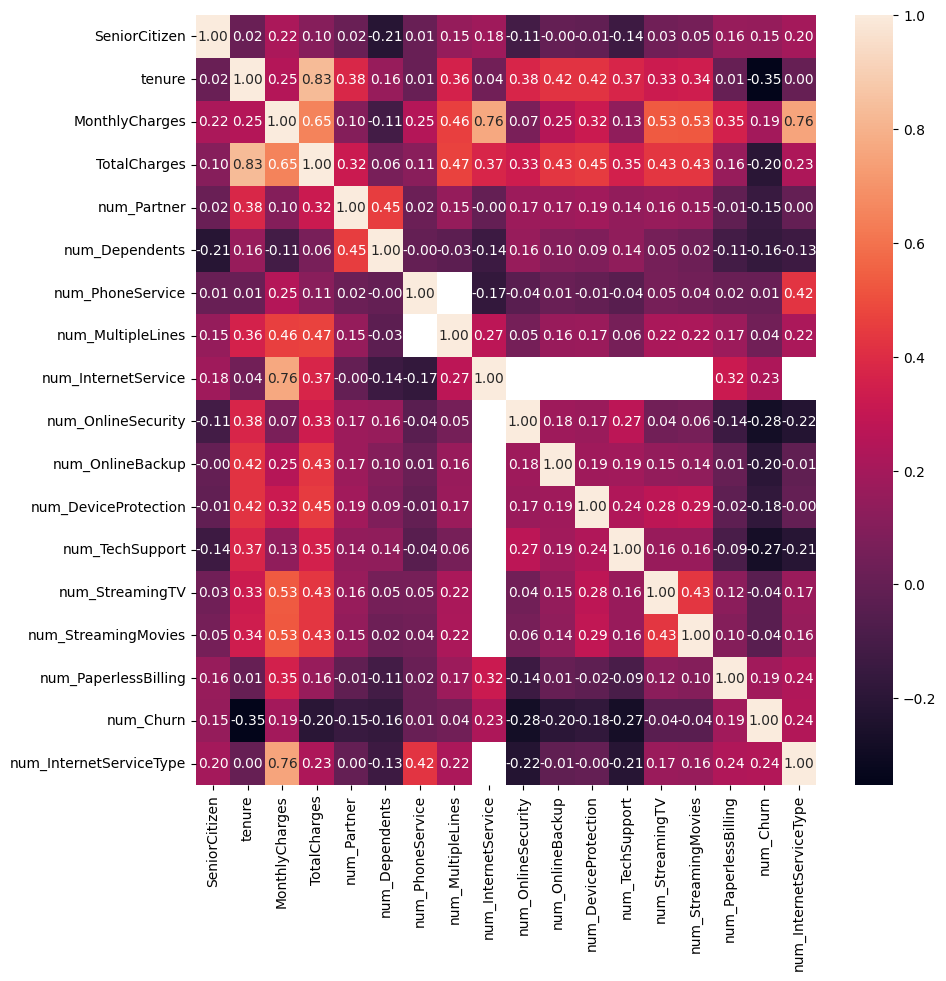

In [57]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',ax=ax)

Some interesting correlations can be visualized, such as:

- As we saw in the univariate analysis section, gender has no correlation with churn, so I excluded it from the analysis.


- Ownership is highly correlated with having additional services.


- Monthly fee is highly correlated with whether or not the customer has Internet service and what type of service. Streaming services also tend to increase monthly charges. It is expected that the more services, the higher the monthly fee.


- As seen earlier, having partners and/or dependents tends to reduce churn. Assuming that for churn to happen everyone using the service must agree (this is a strong assumption, but we will accept it as true for explanatory purposes), churn tends to occur less for customers with partners and dependents.


- A better picture of the additional Internet services can be found in the following heat map:

<AxesSubplot:>

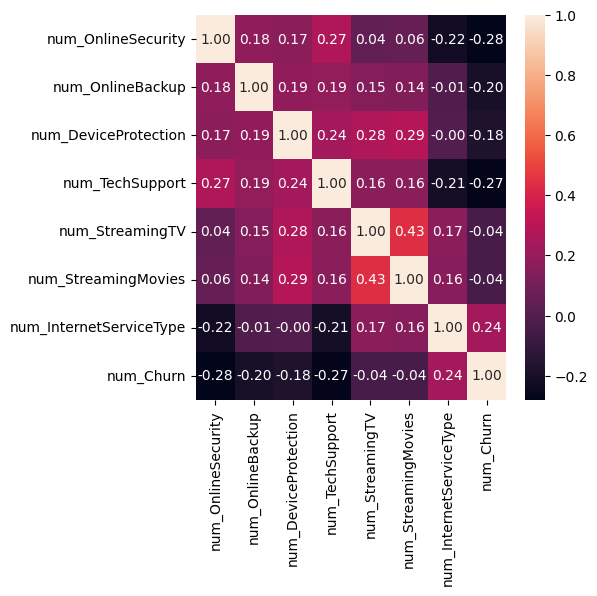

In [34]:
additional_internet = ['num_OnlineSecurity', 'num_OnlineBackup', 'num_DeviceProtection', 'num_TechSupport', 'num_StreamingTV', 'num_StreamingMovies', 'num_InternetServiceType', 'num_Churn']
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(df[additional_internet].corr(),annot=True,fmt='.2f',ax=ax)

- Online Security, Online Backup, Device Protection and Technical Support have high correlations with churn. Perhaps the existence of these services makes the relationship between the customer and the company stronger, preventing churn. If this hypothesis is proven, strategies can be established to increase the proportion of customers who have these services as a way to reduce churn.


- Fiber optic Internet service (+1 after transformation) seems to be inversely correlated with having online security and technical support. The customer who uses more of this type of Internet service churned more. Since this is an artificial dataset, it lacks context, but in a real situation, the operational situation of the fiber optic service should be checked as a way to understand the high incidence of churn in these cases.


- It is common to have both streaming services (TV and movies), which does not seem to have a large impact on reducing churn.

### 2.4 Tenure analysis 

Tenure is an extremely important variable when we are analyzing churn. Besides being directly affected by the occurrence of churn, the analysis of tenure shows trends in customer permanence and is essential to understand at what point in the contract customers tend to stop relating to the company.

Binning the tenure of the customers into 10 bins, we can plot a curve of the average churn for each bin.

In [58]:
def binmean(x):
    return float((x.left+x.right)/2)

tenure_df = df.copy()
bins = [2*i-1 for i in range(37)]
tenure_df['TenureBin'] = pd.cut(df['tenure'], bins=bins)

tenure_pt = pd.pivot_table(tenure_df,index = ['TenureBin'],aggfunc=['mean','count','sum'])
tenure_pt = tenure_pt.reset_index()
tenure_pt['TenureBinMean'] = tenure_pt['TenureBin'].apply(lambda x: binmean(x))

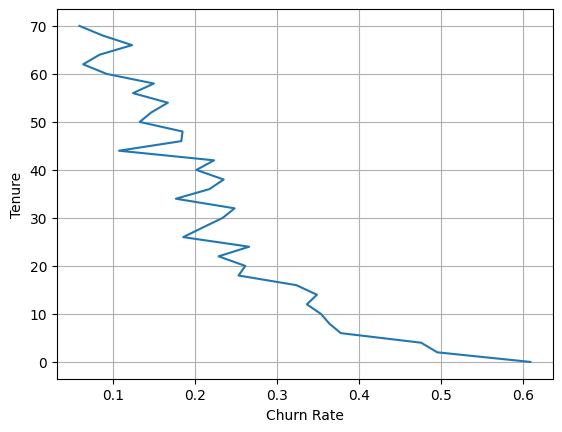

In [59]:
fig, ax = plt.subplots()
ax.plot(tenure_pt[('mean','num_Churn')],tenure_pt[('TenureBinMean','')])
ax.set_xlabel('Churn Rate')
_ = ax.set_ylabel('Tenure')
plt.grid()
#ax.tick_params(axis='x', labelrotation=90)

The churn rate seems to decrease with increasing tenure, which is expected, because churned customers tend to have lower tenure due to the very definition of churn. There are some unexpected "reversals" in the plot. Some effects such as the end of an annual or biennial contract can, to some extent, be seen in the graph. A separate graph for each of the contract types will be created to allow this visualization.

In [37]:
def binmean(x):
    return (x.left+x.right)/2

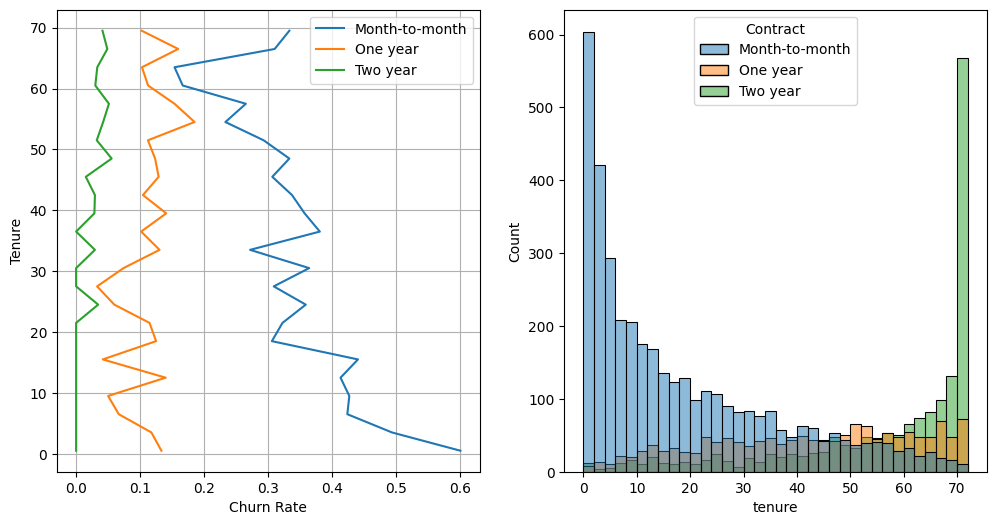

In [38]:
tenure_df = df.copy()
bins = [3*i-1 for i in range(25)]
tenure_df['TenureBin'] = pd.cut(df['tenure'], bins=bins)
tenure_pt = pd.pivot_table(tenure_df,index = ['Contract','TenureBin'],aggfunc=['mean','count','sum'])
tenure_pt = tenure_pt.reset_index()
tenure_pt['TenureBinMean'] = tenure_pt['TenureBin'].apply(lambda x: binmean(x))
fig, axes = plt.subplots(1,2,figsize=(12,6))
for contract in df['Contract'].unique():
    contract_df = tenure_pt.loc[tenure_pt['Contract'] == contract]
    axes[0].plot(contract_df[('mean','num_Churn')],contract_df[('TenureBinMean','')],label=contract)
axes[0].set_xlabel('Churn Rate')
_ = axes[0].set_ylabel('Tenure')
sns.histplot(x='tenure',hue='Contract',data=df,ax=axes[1],bins=36)
axes[0].legend()
axes[0].grid()

In [39]:
aux_df = df[['tenure','Contract','num_Churn']].copy()
contracts_dfs = {}
for contract in df['Contract'].unique():
    contract_df = aux_df.loc[aux_df['Contract'] == contract]
    contract_df['TenureBin'] = pd.qcut(contract_df['tenure'], q=4)
    contract_df = pd.pivot_table(contract_df,index = ['Contract','TenureBin'],aggfunc=['mean','count'])
    contracts_dfs[contract] = contract_df
    display(contract_df)

mean                count       
                            num_Churn     tenure num_Churn tenure
Contract       TenureBin                                         
Month-to-month (0.999, 3.0]  0.580488   1.597073      1025   1025
               (3.0, 12.0]   0.442724   7.519092       969    969
               (12.0, 29.0]  0.364301  20.127349       958    958
               (29.0, 72.0]  0.305525  45.164680       923    923

mean                count       
                        num_Churn     tenure num_Churn tenure
Contract TenureBin                                           
One year (-0.001, 27.0]  0.085052  16.641753       388    388
         (27.0, 44.0]    0.105263  36.304709       361    361
         (44.0, 58.0]    0.138965  51.719346       367    367
         (58.0, 72.0]    0.123249  65.512605       357    357

mean                count       
                        num_Churn     tenure num_Churn tenure
Contract TenureBin                                           
Two year (-0.001, 48.0]  0.013889  29.828704       432    432
         (48.0, 64.0]    0.037825  57.690307       423    423
         (64.0, 71.0]    0.044266  68.774648       497    497
         (71.0, 72.0]    0.011662  72.000000       343    343

As we saw earlier, the churn rate decreases with increasing contract duration.

For customers with two-year contracts, the churn rate is 0 until the 24-month tenure, which could be related to the end of the first contract. From the available data, we cannot know whether the customer always had the two-year contract once or acquired it later, which could be useful information to better understand the effect of the end of the contract on the churn rate. Only 25% of customers with two-year contracts are 48 months or less in length, with a churn rate of 1.4%, while 25% of them are 72 months in length, with a churn rate of 1.2%.

For clients who have signed one-year contracts, unlike the previous case, there are many cases of churn before the end of the contract. Perhaps the fine for breach of contract is lower in this case, so that dissatisfied customers churn more before 12 months. Furthermore, we can see an increase in the churn rate with the length of the contract. The first quartile of customers have 27 months or less of tenure and a churn rate of 8.5%. In the 4th quartile are customers with tenures longer than 58 months, with a churn rate of 12.3%, which is almost 50% higher than for those in the 1st quartile.

For month-to-month contract owners, the churn rate seems to decrease with the tenure period. After 70 months, there is a spike in the churn rate. It is important to note that there are few month-to-month customers with these high tenures. 25% of customers have 3 months or less tenure, with a turnover rate of 58%. 50% have less than a year with the company, with a lower but still high churn rate of 44.3%. Only 25% of customers with this type of contract have more than 29 months tenure, with a churn rate of 30.5%.

Overall, we can see that the churn rate is higher for customers with low tenure in most cases, which are a good portion of the Telco's customer base. Over 50% of customers have less than 30 months of tenure, with a churn rate of 39.5%, while for those with 30 months or more of tenure, the churn rate is 13.2%. Possibly, actions to increase customer retention at the beginning of their contracts could help increase CLV. Encouraging the adoption of annual or biennial contracts with reduced monthly charges, for example, might be a measure that could reduce churn after a few months of contract. To draw better conclusions, we would need other information, such as the reason for churn and about the seasonality of churn.

## 3. Churn Prediction

We will train a classifier from the data to help predict whether or not a customer will churn. Instead of focusing on the output of the classifier (Churn or Not Churn), we can focus on the probability of classification, which would indicate, in a sense, the probability of churn for a given customer.

We have "conditional" features in the dataset. For example, we will only have an Internet service type if the customer has Internet service. So we will use one enconding at a time to create a dataset that can be used to train many different types of classifiers.

In [60]:
ml_df = pd.read_csv('data/churn_data.csv')

def floatfy(x):
    try:
        float(x)
        return float(x)
    except:
        return np.nan
        
ml_df = ml_df.drop(['customerID','gender'],axis=1)
        
ml_df['TotalCharges'] = ml_df['TotalCharges'].apply(floatfy)

map_dict = {'Yes': True,
    'No': False,
    'No internet service': False
}

to_map_columns = ['OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in to_map_columns:
    ml_df[col] = ml_df[col].map(map_dict)


to_oh_columns_df = ['PhoneService','Partner','Dependents','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']

to_oh_columns = ['InternetService','MultipleLines','PaymentMethod','Contract']

for col in to_oh_columns_df:
    ml_df = pd.concat([ml_df,pd.get_dummies(ml_df[col],prefix=col,prefix_sep = ' ',drop_first=True)],axis=1)
    
for col in to_oh_columns:
    ml_df = pd.concat([ml_df,pd.get_dummies(ml_df[col],prefix=col,prefix_sep = ' ')],axis=1)
    
ml_df = pd.concat([ml_df,pd.get_dummies(ml_df['Churn'],prefix='Churn',prefix_sep = ' ',drop_first=True)],axis=1)

ml_df = ml_df.drop(to_oh_columns_df+to_oh_columns+['Churn'],axis=1)
ml_df = ml_df.dropna(axis=1)

Now we need to prepare the data to be used for training classifiers. We will scale the values because some algorithms are sensitive to the difference in the order of magnitude of the features.

In [42]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [43]:
X = ml_df[ml_df.columns[:-1]]
y = ml_df[ml_df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X,y)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We will use GridSearchCV to perform a grid search of hyperparameters in order to make it possible to compare different "optimized" algorithms of classification. The selected classifiers are **K Nearest Neighbors (KNN)**, **Support Vector Machine (SVC)**, **Logistic Regression (LRC)** and **Random Forest (RFC**. Accuracy and roc auc metrics will be calculated as a way to allow evaluation of the performance of the classifiers on the unbalanced dataset.

In [48]:
name = "KNN"

knn = KNeighborsClassifier()

params = {'n_neighbors': [2,5,10,20,50,100,200]}

clf = GridSearchCV(knn, params, scoring = ['accuracy','roc_auc'], refit = 'accuracy')

clf.fit(X,y)

i = list(clf.cv_results_['rank_test_accuracy']).index(1)

for prop in ['params','mean_test_accuracy','mean_test_roc_auc']:
    print("Best {} classifier {}: {}".format(name,prop,clf.cv_results_[prop][i]))

Best KNN classifier params: {'n_neighbors': 100}
Best KNN classifier mean_test_accuracy: 0.7908571722369185
Best KNN classifier mean_test_roc_auc: 0.8203918971738622


In [49]:
name = "SVC"

svc = SVC()

params = {'C': [0.05,0.1,0.5,1,5]}

clf = GridSearchCV(svc, params, scoring = ['accuracy','roc_auc'], refit = 'accuracy')

clf.fit(X,y)

i = list(clf.cv_results_['rank_test_accuracy']).index(1)

for prop in ['params','mean_test_accuracy','mean_test_roc_auc']:
    print("Best {} classifier {}: {}".format(name,prop,clf.cv_results_[prop][i]))

Best SVC classifier params: {'C': 0.5}
Best SVC classifier mean_test_accuracy: 0.7911408598941867
Best SVC classifier mean_test_roc_auc: 0.7803563916217906


In [50]:
name = "LRC"

lgr = LogisticRegression()

params = {'C': [0.05,0.1,0.5,1,5]}

clf = GridSearchCV(lgr, params, scoring = ['accuracy','roc_auc'], refit = 'accuracy')

clf.fit(X,y)
clf.cv_results_

i = list(clf.cv_results_['rank_test_accuracy']).index(1)

for prop in ['params','mean_test_accuracy','mean_test_roc_auc']:
    print("Best {} classifier {}: {}".format(name,prop,clf.cv_results_[prop][i]))

Best LRC classifier params: {'C': 0.05}
Best LRC classifier mean_test_accuracy: 0.8032094812568552
Best LRC classifier mean_test_roc_auc: 0.8432847369112851


In [51]:
name = "RFC"

rfc = RandomForestClassifier()

params = {'n_estimators': [20,50,100,200,500]}

clf = GridSearchCV(rfc, params, scoring = ['accuracy','roc_auc'], refit = 'accuracy')

clf.fit(X,y)
clf.cv_results_

i = list(clf.cv_results_['rank_test_accuracy']).index(1)

for prop in ['params','mean_test_accuracy','mean_test_roc_auc']:
    print("Best {} classifier {}: {}".format(name,prop,clf.cv_results_[prop][i]))

Best RFC classifier params: {'n_estimators': 500}
Best RFC classifier mean_test_accuracy: 0.7861717893089877
Best RFC classifier mean_test_roc_auc: 0.8178781852228626


The algorithm with the highest score was the Logistic Regression using a C of 0.05, achieving an accuracy of 80.3% and a roc auc of 0.843. It's important to notice that this accuracy isn't too high because the dataset is very unbalanced. But, as said before, the probability of prediction is a good measure to use in order to find which customers tends more to churn.

## 4. Conclusion

From the same dataset we are able to perform two types of valuable analyses for the company.

Through Exploratory Data Analysis we were able to find trends and visualize patterns in the data, establish hypotheses (which could not be validated due to lack of context), and propose solutions to circumvent high churn rates for certain customer groups. EDA is a process that relies heavily on human analysis to extract value from the data. Overall, we were able to bring out some interesting points from it:

- The high churn rate for customers who contract fiber-optic internet service needs investigation so that we can understand its motivation and how to decrease it.

- Additional internet services such as online backup and tech support correlate with lower churn rates. With a deeper analysis of this correlation, actions could be proposed in order to encourage the hiring of these services as a way to reduce the churn rate.

- Senior Citizens tend to have a higher churn rate than other customers.

- Longer term contracts tend to reduce churn, especially in the first months, which is very common for Telco customers.

- Customers who use eCheck tend to have a higher churn rate than for the other payment methods. Just as for fiber optic internet, this situation needs investigation.

On the other hand, through machine learning, we can build a classifier capable of predicting the probability that a customer will churn. This can help us find the customers most likely to stop using the company's services within the active customer base so that specific measures can be taken to retain them. Offering service package enhancements at no additional cost or offering long term contracts with benefits for month-to-month customers are measures that can be used to avoid churn in a high probability case. 

Overall, data analysis is a key point to understand what drives customers to churn and how to avoid it, in order to create a high-tenure customer base, thus reducing the cost of acquiring new customers and making the company more profitable.